# KMeans

In [28]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [32]:
iris=load_iris()
pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [34]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [35]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [40]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result= irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       0          50
1       1          48
        2           2
2       1          14
        2          36
Name: sepal_length, dtype: int64


In [42]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']= pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

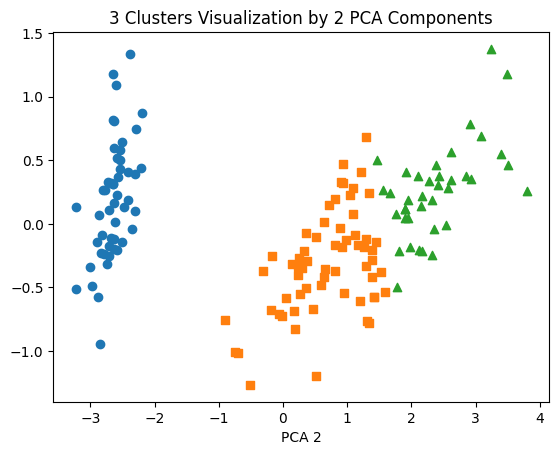

In [47]:
# 군집 값이 0,1,2 인 경우마다 별도의 인덱스로 추출
marker0_ind= irisDF[irisDF['cluster']==0].index
marker1_ind= irisDF[irisDF['cluster']==1].index
marker2_ind= irisDF[irisDF['cluster']==2].index

# 군집 값이 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o, s, ^마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [50]:
X,y= make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts= np.unique(y, return_counts= True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [51]:
# 데이터프레임으로 변환
import pandas as pd

clusterDF= pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


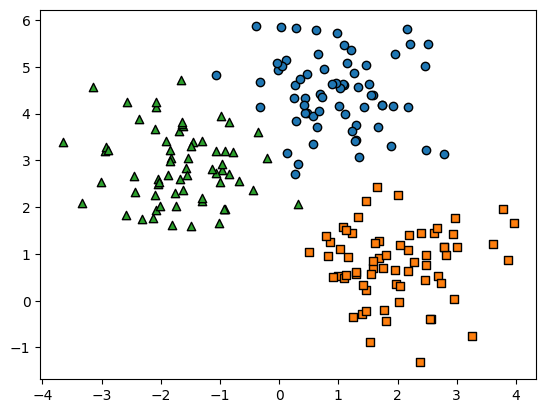

In [54]:
target_list= np.unique(y)
# 각 타깃별 산점도 마커값
markers=['o', 's', '^', 'P','D','H','X']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는[0,1,2]
for target in target_list:
    target_cluster= clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

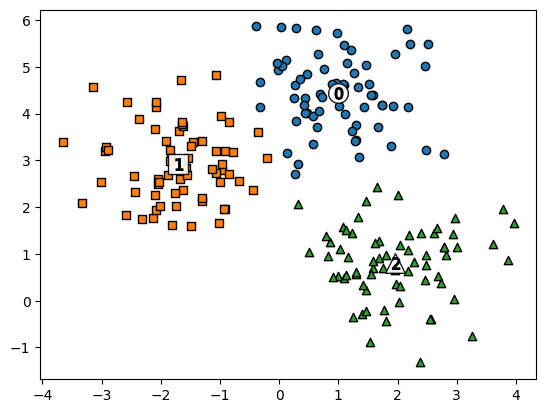

In [68]:
# 군집별 시각화
#KMeans 객체를 이용해 X데이터를 K-Means클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels= kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers= kmeans.cluster_centers_
unique_labels= np.unique(cluster_labels)
markers=['o','s','^','P','D','H','X']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatterplot 수행
for label in unique_labels:
    label_cluster= clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker= markers[label])
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label)

In [69]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
